In [1]:
#  For a given dataset predict number of bikes getting shared based on different parameters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Importing the dataset
data = pd.read_csv('bike_sharing.csv',sep=',')
data=data.head(25)
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
X=data['temp'].values
y=data['cnt'].values

In [27]:
X=X.reshape(-1,1)
X

array([[0.24],
       [0.22],
       [0.22],
       [0.24],
       [0.24],
       [0.24],
       [0.22],
       [0.2 ],
       [0.24],
       [0.32],
       [0.38],
       [0.36],
       [0.42],
       [0.46],
       [0.46],
       [0.44],
       [0.42],
       [0.44],
       [0.42],
       [0.42],
       [0.4 ],
       [0.4 ],
       [0.4 ],
       [0.46],
       [0.46]])

In [28]:
y=y.reshape(-1,1)
y

array([[ 16],
       [ 40],
       [ 32],
       [ 13],
       [  1],
       [  1],
       [  2],
       [  3],
       [  8],
       [ 14],
       [ 36],
       [ 56],
       [ 84],
       [ 94],
       [106],
       [110],
       [ 93],
       [ 67],
       [ 35],
       [ 37],
       [ 36],
       [ 34],
       [ 28],
       [ 39],
       [ 17]], dtype=int64)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\91807\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [31]:
y_pred = regressor.predict([[7.5]])
y_pred = sc_y.inverse_transform([y_pred]) 

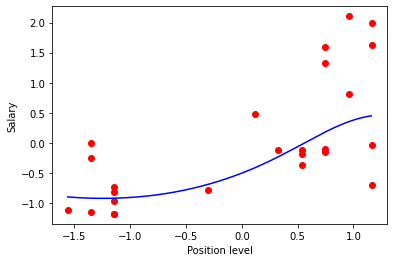

In [32]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()